In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Step 1 - Data Loading
train_path = "../data/covtype/covtype_train.csv"
test_path = "../data/covtype/covtype_test.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

df_train.head()


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,3351,206,27,726,124,3813,192,252,180,2271,...,0,0,0,0,0,0,1,0,0,1
1,2732,129,7,212,1,1082,231,236,137,912,...,0,0,0,0,0,0,0,0,0,2
2,2572,24,9,201,25,957,216,222,142,2191,...,0,0,0,0,0,0,0,0,0,2
3,2824,69,13,417,39,3223,233,214,110,6478,...,0,0,0,0,0,0,0,0,0,2
4,2529,84,5,120,9,1092,227,231,139,4983,...,0,0,0,0,0,0,0,0,0,2


In [4]:
df_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [5]:
# Step 2 - Data Overview
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

# Column types and non-null counts
print("\nTrain info:")
df_train.info()

print("\nTrain describe (numeric columns):")
df_train.describe().T.head(15)

Train shape: (58101, 55)
Test shape: (3500, 54)

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58101 entries, 0 to 58100
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           58101 non-null  int64
 1   Aspect                              58101 non-null  int64
 2   Slope                               58101 non-null  int64
 3   Horizontal_Distance_To_Hydrology    58101 non-null  int64
 4   Vertical_Distance_To_Hydrology      58101 non-null  int64
 5   Horizontal_Distance_To_Roadways     58101 non-null  int64
 6   Hillshade_9am                       58101 non-null  int64
 7   Hillshade_Noon                      58101 non-null  int64
 8   Hillshade_3pm                       58101 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  58101 non-null  int64
 10  Wilderness_Area1                    58101 non-null  int64
 11  Wilder

,count,mean,std,min,25%,50%,75%,max
Elevation,58101.0,2961.095695,279.091350,1871.0,2810.0,2997.0,3165.0,3846.0
Aspect,58101.0,156.183508,112.026044,0.0,59.0,127.0,262.0,360.0
Slope,58101.0,14.113045,7.475782,0.0,9.0,13.0,18.0,62.0
Horizontal_Distance_To_Hydrology,58101.0,269.666649,212.153471,0.0,108.0,218.0,390.0,1361.0
Vertical_Distance_To_Hydrology,58101.0,46.146831,57.974062,-173.0,7.0,29.0,68.0,597.0
Horizontal_Distance_To_Roadways,58101.0,2351.007676,1559.032488,0.0,1106.0,2007.0,3331.0,7087.0
Hillshade_9am,58101.0,212.197690,26.746347,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,58101.0,223.333660,19.742694,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,58101.0,142.471816,38.488692,0.0,119.0,143.0,169.0,253.0
Horizontal_Distance_To_Fire_Points,58101.0,1984.694962,1324.055063,0.0,1024.0,1716.0,2554.0,7145.0


In [6]:
# Step 3 - Check missing values
missing_counts = df_train.isnull().sum()
print("Missing values per column (train):")
print(missing_counts[missing_counts > 0])

print("\nTotal missing values:", missing_counts.sum())

Missing values per column (train):
Series([], dtype: int64)

Total missing values: 0


Target value counts:
Cover_Type
1    21297
2    28248
3     3607
4      259
5      932
6     1706
7     2052
Name: count, dtype: int64


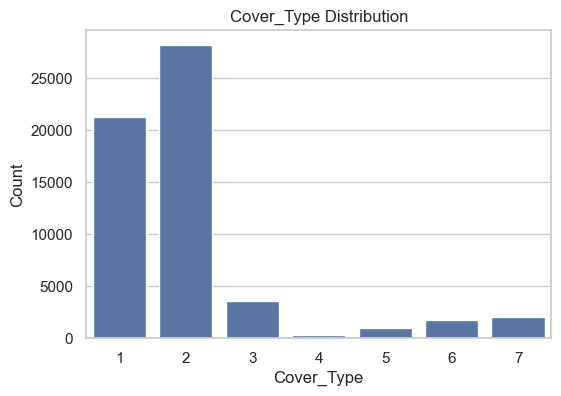

/var/folders/tf/n6cfvr4n4619m02yggszzzb40000gn/T/ipykernel_10002/2910565133.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


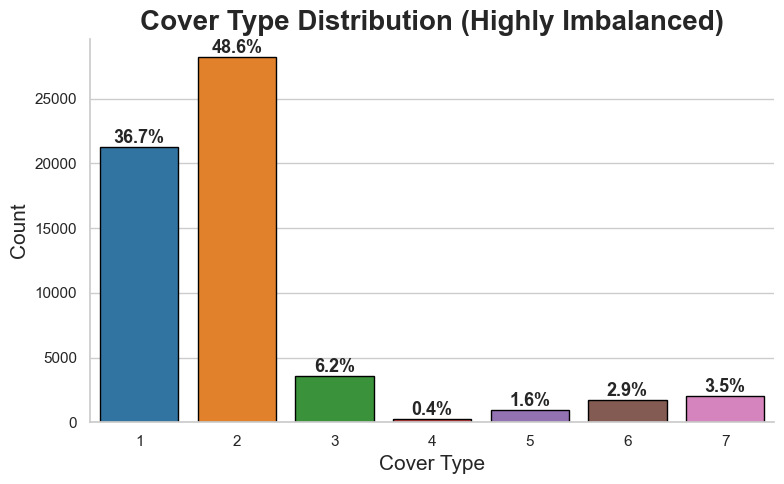

In [9]:
# Step 4 - Target Variable Distribution
target_col = 'Cover_Type'

print("Target value counts:")
print(df_train[target_col].value_counts().sort_index())

plt.figure(figsize=(6, 4))
sns.countplot(x=df_train[target_col])
plt.title("Cover_Type Distribution")
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.show()

# Note: Dataset highly imbalanced！

sns.set(style="whitegrid")

counts = df_train[target_col].value_counts().sort_index()
total = counts.sum()
percentages = (counts / total * 100).round(1)

plt.figure(figsize=(8, 5))

# Vibrant palette（海报最常用的鲜艳色彩）
colors = sns.color_palette("tab10", len(counts))

bars = sns.barplot(
    x=counts.index.astype(str),
    y=counts.values,
    palette=colors,
    edgecolor="black",
    linewidth=1
)

for bar, pct in zip(bars.patches, percentages):
    height = bar.get_height()
    bars.annotate(
        f"{pct}%",
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center", va="bottom",
        fontsize=13, fontweight="bold"
    )

plt.title("Cover Type Distribution (Highly Imbalanced)", fontsize=20, fontweight="bold")
plt.xlabel("Cover Type", fontsize=15)
plt.ylabel("Count", fontsize=15)

sns.despine()
plt.tight_layout()
plt.show()

Number of numeric columns: 55


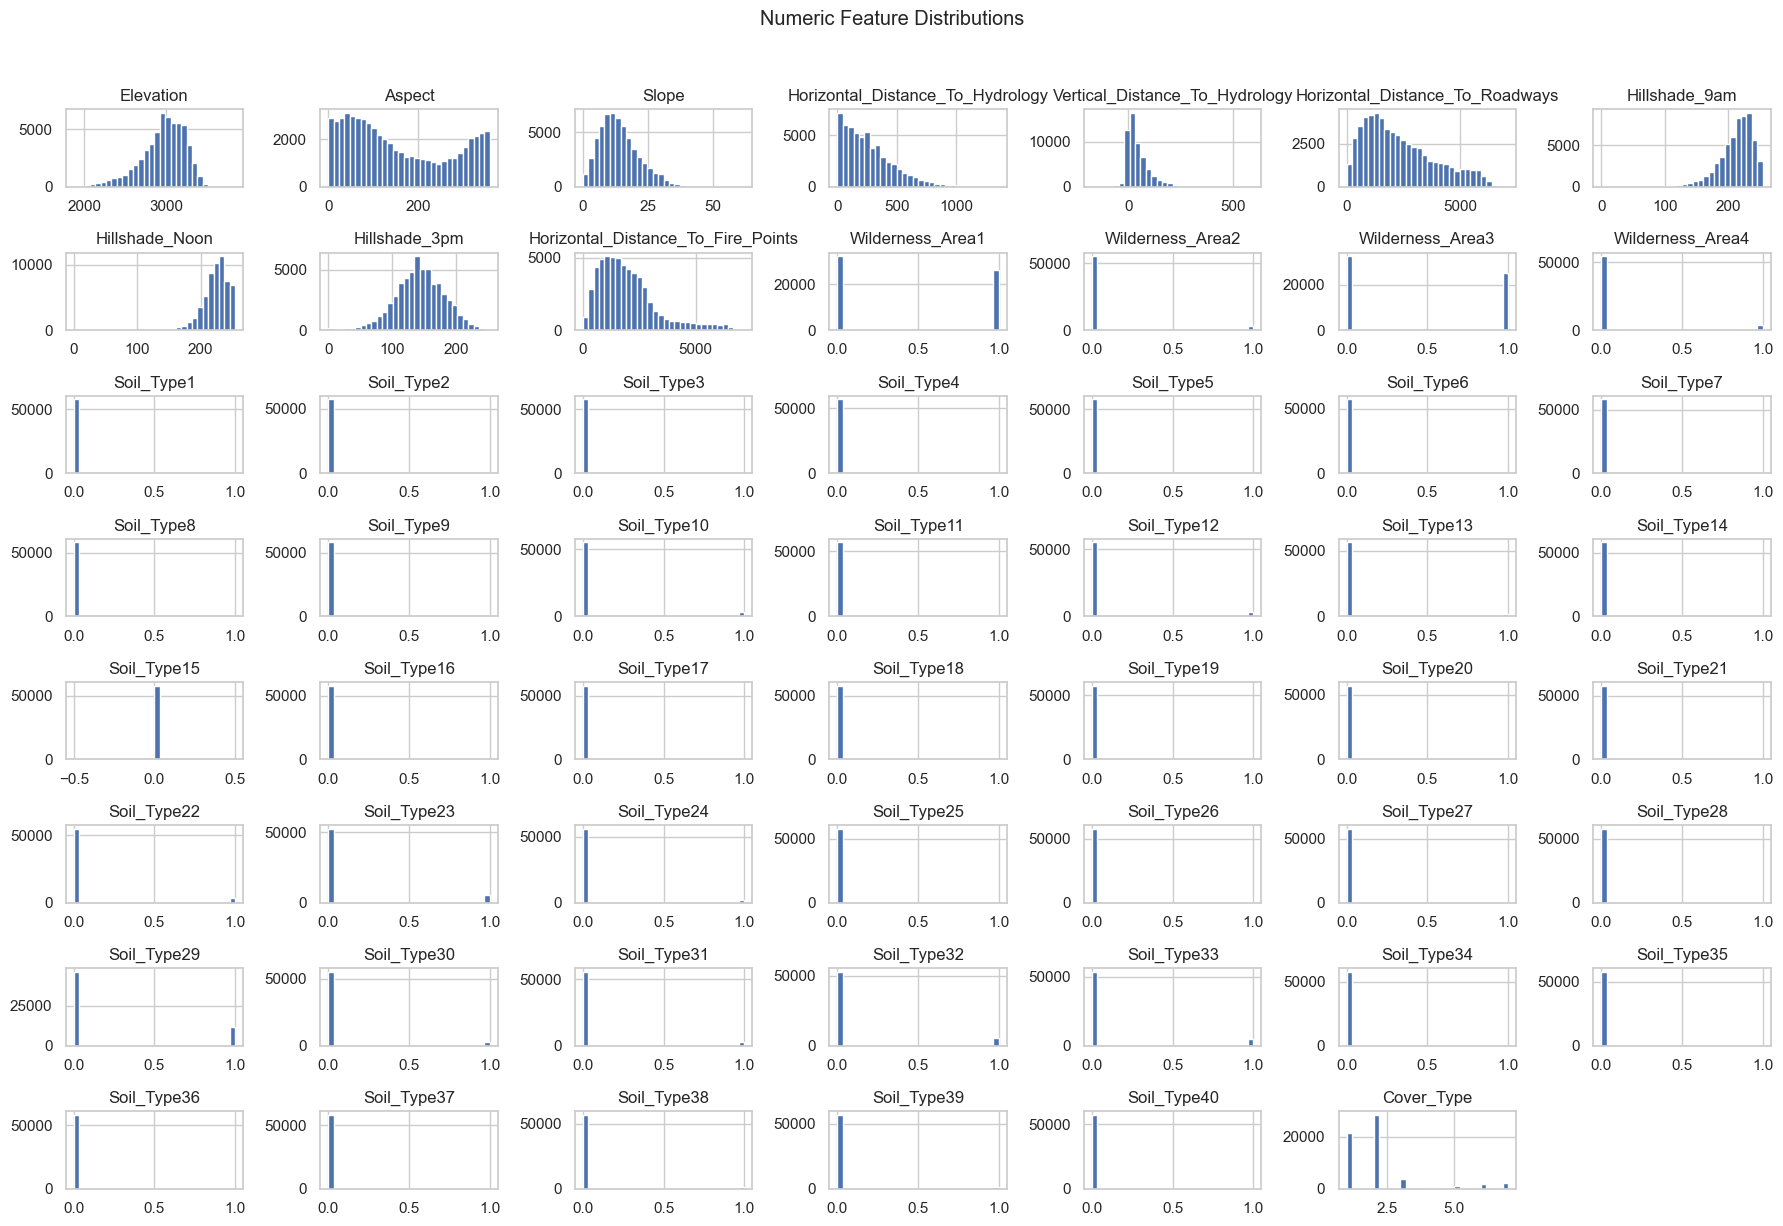

In [10]:
# Step 5 - Numerical Feature Distributions
numeric_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
print(f"Number of numeric columns: {len(numeric_cols)}")

df_train[numeric_cols].hist(bins=30, figsize=(18, 12))
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()

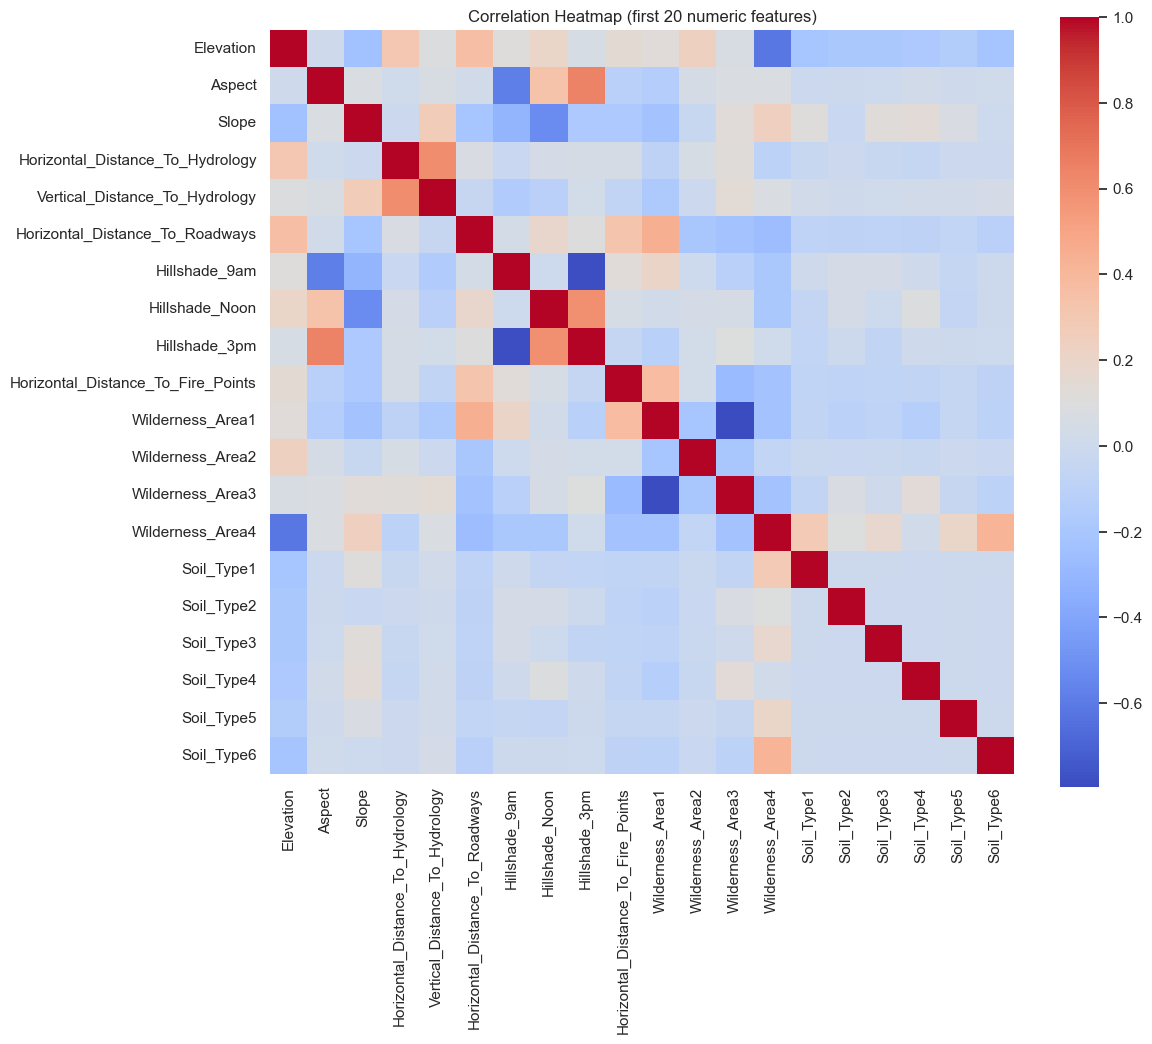

In [11]:
# Step 6 - Correlation Heatmap
subset_cols = numeric_cols[:20]
corr_matrix = df_train[subset_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (first 20 numeric features)")
plt.show()

Correlation Analysis Summary

The first few continuous geographic features (e.g., Elevation, Slope, Aspect, Hillshade) show moderate correlations, which is expected due to natural terrain patterns.

One-hot encoded features (Soil_Type1–Soil_Type40 and Wilderness_Area variables) have near-zero correlation with each other, confirming no multicollinearity issues.

Overall, the dataset exhibits low feature-to-feature correlation, indicating that dimensionality reduction (e.g., PCA) is unnecessary.

The structure is highly suitable for tree-based models (LightGBM, XGBoost) and transformer-based tabular models (TabPFN), which can leverage sparse and heterogeneous tabular inputs effectively.

## EDA Summary – CovType Dataset

1. **Data Types & Structure**
   - The dataset contains **55 purely numeric features** and **no missing values**.
   - It includes a mix of continuous geographic features and many one-hot encoded binary features.

2. **Binary Features**
   - A large portion of the features are **one-hot encoded**:
     - 40 `Soil_Type` variables  
     - 4 `Wilderness_Area` variables  
   - These binary features show **near-zero correlation**, indicating no multicollinearity issues.

3. **Continuous Features**
   - Features such as *Elevation*, *Aspect*, *Slope*, *Hillshade_X*, and various distance measurements display:
     - Skewed distributions  
     - Natural moderate correlations (e.g., between Hillshade features or terrain distances)

4. **Correlation Structure**
   - Overall correlation levels are **low**, meaning:
     - Dimensionality reduction (like PCA) is unnecessary  
     - The dataset is well-suited for tree-based models and transformer-based tabular models  

5. **Target Variable**
   - The target `Cover_Type` is **highly imbalanced**:
     - Classes 1 and 2 dominate  
     - Classes 4, 5, 6, 7 are underrepresented  

6. **Modeling Implications**
   - No scaling or imputation is required.
   - Tree-based models (LightGBM, XGBoost) are ideal.
   - Consider class balancing techniques due to severe class imbalance.
